## Sentiment analysis on capital punishment in Singapore using Reddit comments

#### 02 Data cleaning and labelling

In [113]:
# Imports
import pandas as pd
import re

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [114]:
df = pd.read_csv('./data/reddit_comments.csv', index_col=0)

In [115]:
df

,date,sub_id,title,comment_id,comment_author,comment_text,upvote_score,comment_or_reply
0,2023-04-24 09:52:08,12wypqz,Why Tangaraju Suppiah doesn’t deserve to die,jhhov8d,MolassesBulky,Clearly did not read the judgement. He coordinated delivery and pick-up. He did not touch the drugs or was at the location. A Malaysian mule did the delivery and a Singapore mule assigned to do the pick-up. Both mules were arrested by CNB and he kept communicating with them without realising they were arrested. CNB also listened in to the call and guided the conversation of the Malaysian mule. \n\nHe was convicted on the strength of what Justice Hoo called “objective evidence” - the numerous logged calls he made the day before and that day from his 2 mobiles to the mules even after the arrest. This is over and above the 2 mules implicating him. \n\nHe did not disclose his upstream and downstream suppliers and dealers and repeatedly denied even making the calls. He could not explain why the calls came from his mobiles. \n\n So we have a mastermind.,53,comment
1,2023-04-24 09:52:08,12wypqz,Why Tangaraju Suppiah doesn’t deserve to die,jhhpe8w,FlipFlopForALiving,"“Oops, buttdial”",9,reply
2,2023-04-24 09:52:08,12wypqz,Why Tangaraju Suppiah doesn’t deserve to die,jhydzun,elmobiggay,"You think you're CIA or some shit? Your reasoning is baseless, and you just straight up derive your conclusion out of biases you already have. Please hear yourself out lah you sound riduculous",0,reply
3,2023-04-24 09:52:08,12wypqz,Why Tangaraju Suppiah doesn’t deserve to die,jhhhbao,SmegmaSlushie,"I don’t support the DP, but Richard Branson poor critique is so flawed that its not helping at all",17,comment
4,2023-04-24 09:52:08,12wypqz,Why Tangaraju Suppiah doesn’t deserve to die,jhhsnfo,MolassesBulky,"This is why it so damaging to those who want to do away with DP. No foundation, baseless accusations, grandstanding, pick the wrong case. If CNB and Courts did not do their job, the 2 mules and the girlfriend of one of the mules might have paid the ultimate price instead of this guy.",17,reply
...,...,...,...,...,...,...,...,...
608,2023-04-26 05:11:22,12yw7qd,"Breaking: Singapore will execute man tomorrow over possession of Cannabis. So tragic, light one up for man if you’re fortunate to be able to",jhs3x80,hopeful_pancake,"I hope his last meal gets to be edibles.. 9 years on death row without any smokes, Jeez",1,comment
609,2023-04-26 05:11:22,12yw7qd,"Breaking: Singapore will execute man tomorrow over possession of Cannabis. So tragic, light one up for man if you’re fortunate to be able to",jhs4adh,Suntzu_AU,"Singapore is NOT a democracy. This is the result, sadly.",1,comment
610,2023-04-26 05:11:22,12yw7qd,"Breaking: Singapore will execute man tomorrow over possession of Cannabis. So tragic, light one up for man if you’re fortunate to be able to",jhs5xlc,Educational-Tomato58,"Drug policies are so antiquated and devastating. It’s just another means to imprison people and control them. And 100 years ago, most of these policies did not exist!\n\nThe pharmaceutical industry can push out drugs with certain levels of side effects and it’s legal. But get caught with cannabis, a drug that can probably replace 5+ prescription medications, and you’re in jail (depending on your location).",1,comment
611,2023-04-26 05:11:22,12yw7qd,"Breaking: Singapore will execute man tomorrow over possession of Cannabis. So tragic, light one up for man if you’re fortunate to be able to",jhs6jhp,Most_Business_9495,"They did not execute him, they murdered him. Don't use their language",1,comment


Dataframe contains [removed] etc. which are comments that were removed. Need to clean them.

In [116]:
df[df['comment_text'].str.contains('[', regex=False)]

,date,sub_id,title,comment_id,comment_author,comment_text,upvote_score,comment_or_reply
10,2023-04-24 09:52:08,12wypqz,Why Tangaraju Suppiah doesn’t deserve to die,jhha4uk,Paullesq,"The argument is that the mandatory death penalty is ineffectual because you tend to wind up executing large numbers of mules who basically don't impact the drug trade. Occasionally getting some mid level facilitator like this guy does not change the overall picture. TBH, I never really agreed with this argument because I think that the death penalty should perhaps only be used in the case of premeditated murder. A life for a life. Anything else is morally incoherent.\n\nThat said, if you want to make a strawman that makes other people sound hypocritical, that may not be the characterization your should be fighting for.\n\nIf you want to make accusations about hypocrisy, maybe look at the Sg government? We launder money from HNW government figures from narco states like North Korea and Myanmar. We we allow their leaders who are widely known to be facilitators in the drug trade to come here for treatment and luxury shopping that they are unable get in homes countries because they have destroyed them. North Korea in particular is long known for using its embassies to smuggle drugs. We are one of the few countries to host a North Korean Embassy. The embassy here in particular is well known for being used for sanctions busting and other illicit activity. North Korea has in the past recruited Singaporean nationals to conduct heroin smuggling in other people's countries. I can find no evidence that CNB so much as investigated them.\n\nI think the party whose stance on drugs is ' we are going to kill you for smuggling drugs until you start making above a certain amount of money then we are going to become accomplices and help you launder it and turn a blind eye when you recruit our residents' is the one that is hypocritical.\n\n[https://en.wikipedia.org/wiki/North\_Korea%E2%80%93Singapore\_relations](https://en.wikipedia.org/wiki/North_Korea%E2%80%93Singapore_relations)\n\n[https://www.reuters.com/article/idUSSIN138922](https://www.reuters.com/article/idUSSIN138922)\n\n[https://www.voanews.com/a/un-myanmar-drug-dealing-militias-rebel-armies-ramping-up/6471711.html](https://www.voanews.com/a/un-myanmar-drug-dealing-militias-rebel-armies-ramping-up/6471711.html)\n\n[https://www.washingtonpost.com/news/worldviews/wp/2013/03/22/report-north-korea-ordered-its-foreign-diplomats-to-become-drug-dealers/](https://www.washingtonpost.com/news/worldviews/wp/2013/03/22/report-north-korea-ordered-its-foreign-diplomats-to-become-drug-dealers/)\n\n[https://en.wikipedia.org/wiki/Pong\_Su\_incident](https://en.wikipedia.org/wiki/Pong_Su_incident)\n\n[https://scandasia.com/2376-singaporean-heroin-smuggler-gets-24-years-for-drug-run/](https://scandasia.com/2376-singaporean-heroin-smuggler-gets-24-years-for-drug-run/)",-12,reply
11,2023-04-24 09:52:08,12wypqz,Why Tangaraju Suppiah doesn’t deserve to die,jhgyrw3,NaN,[deleted],0,reply
39,2023-04-26 14:22:27,12z8miu,Tangaraju Suppiah executed after family's appeals for mercy failed - Singapore News,jhrpa4u,roadto75,In 2014 the [estimated price for 1kg of weed was about S$33k.](https://www.asiaone.com/singapore/1kg-cannabis-seized-woodlands-checkpoint)\n\nFactor in inflation and it is probably now worth well over S$50k.,103,reply
40,2023-04-26 14:22:27,12z8miu,Tangaraju Suppiah executed after family's appeals for mercy failed - Singapore News,jhrjghk,ppboy11,">[https://www.elitigation.sg/gdviewer/s/2018\_SGHC\_279](https://www.elitigation.sg/gdviewer/s/2018_SGHC_279)\n\n~~SGD $900~~ \n\n\nedit: the SGD $900 was for the mule, not him",72,reply
43,2023-04-26 14:22:27,12z8miu,Tangaraju Suppiah executed after family's appeals for mercy failed - Singapore News,jhru9ki,NaN,[deleted],1,reply
55,2023-04-26 14:22:27,12z8miu,Tangaraju Suppiah executed after family's appeals for mercy failed - Singapore News,jhrjx5p,NaN,[removed],-25,reply
6

In [117]:
# Remove Deleted and removed comments
df = df.loc[~df['comment_text'].isin(['[deleted]','[removed]'])]

In [118]:
# There are some http links. let's remov it.
for i in df[df['comment_text'].str.contains('http', regex=False)].comment_text:
    print(i)



The argument is that the mandatory death penalty is ineffectual because you tend to wind up executing large numbers of mules who basically don't impact the drug trade. Occasionally getting some mid level facilitator like this guy does not change the overall picture. TBH, I never really agreed with this argument because I think that the death penalty should perhaps only be used in the case of premeditated murder. A life for a life. Anything else is morally incoherent.

That said, if you want to make a strawman that makes other people sound hypocritical, that may not be the characterization your should be fighting for.

If you want to make accusations about hypocrisy, maybe look at the Sg government? We launder money from HNW government figures from narco states like North Korea and Myanmar. We we allow their leaders who are widely known to be facilitators in the drug trade to come here for treatment and luxury shopping that they are unable get in homes countries because they have destro

In [119]:
# Remove http links
df['comment_text'] = df['comment_text'].apply(lambda x: re.sub(r'https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE))

C:\Users\sagar\AppData\Local\Temp\ipykernel_10068\4275088915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment_text'] = df['comment_text'].apply(lambda x: re.sub(r'https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE))


**We do not have the sentiments. So, we will rely on vader sentiment analysis to label the comments as positive, negative or neutral.**

In [120]:
# Function to get sentiment from Vader
sentiment_analyzer = SentimentIntensityAnalyzer()

def sentiment(text):
    sentiment_dict = sentiment_analyzer.polarity_scores(text)
    if sentiment_dict['compound'] >= 0.05 :
        return("Positive")
    elif sentiment_dict['compound'] <= - 0.05 :
        return("Negative")
    else :
        return("Neutral")


In [121]:
# get sentiment label
df['sentiment'] = df['comment_text'].apply(sentiment)

C:\Users\sagar\AppData\Local\Temp\ipykernel_10068\4202685999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['comment_text'].apply(sentiment)


<Axes: ylabel='sentiment'>

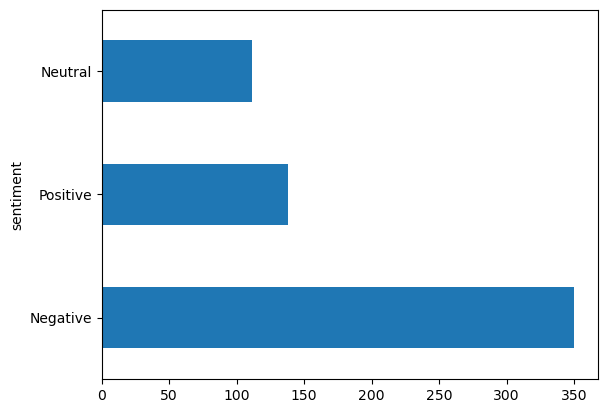

In [122]:
df['sentiment'].value_counts().plot(kind='barh')

**Observations**
- From the sentiment bar chart we can clearly see that the majority show negative sentiment followed by positive and neutral sentiments.

In [126]:
#save the updated DataFrame with sentiment column to csv file
df.to_csv('./data/reddit_comments_with_sentiment.csv')

#### Vader sentiment analysis validation

In [124]:
pred_sentiment_eval = df[['comment_text', 'sentiment']].reset_index()
pred_sentiment_eval.head(20)

,index,comment_text,sentiment
0,0,Clearly did not read the judgement. He coordinated delivery and pick-up. He did not touch the drugs or was at the location. A Malaysian mule did the delivery and a Singapore mule assigned to do the pick-up. Both mules were arrested by CNB and he kept communicating with them without realising they were arrested. CNB also listened in to the call and guided the conversation of the Malaysian mule. \n\nHe was convicted on the strength of what Justice Hoo called “objective evidence” - the numerous logged calls he made the day before and that day from his 2 mobiles to the mules even after the arrest. This is over and above the 2 mules implicating him. \n\nHe did not disclose his upstream and downstream suppliers and dealers and repeatedly denied even making the calls. He could not explain why the calls came from his mobiles. \n\n So we have a mastermind.,Negative
1,1,"“Oops, buttdial”",Neutral
2,2,"You think you're CIA or some shit? Your reasoning is baseless, and you just straight up derive your conclusion out of biases you already have. Please hear yourself out lah you sound riduculous",Negative
3,3,"I don’t support the DP, but Richard Branson poor critique is so flawed that its not helping at all",Negative
4,4,"This is why it so damaging to those who want to do away with DP. No foundation, baseless accusations, grandstanding, pick the wrong case. If CNB and Courts did not do their job, the 2 mules and the girlfriend of one of the mules might have paid the ultimate price instead of this guy.",Negative
5,5,"These SJWs still haven’t realised that this is not the case they should be fighting for. They want the “higher ups” to be caught, this is your “higher up”.",Negative
6,6,"You can’t satisfy them, they will always move goalposts once their arguments are disproven.\n\n Get rid of mules - this won’t change anything, the boss will just hire another mule and continue.\n\nOk, we get rid of the boss - they didn’t even touch the drugs themselves, this is unfair punishment.",Negative
7,7,You should see instagram...they literally say oh he never touch drug so he is innocent. Like you can't win argument against dumb people,Neutral
8,8,They’ll blindly fight for anything without fully understanding the facts lol.,Positive
9,9,They fought for Amos Yee last time,Negative


**Comments**

- From the above validation, we can observe that the positive, negative and neutral sentiments are correctly captured.
- We can use this derived sentiment column as Y_true for our modeling.